In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as la
import matplotlib.pyplot as plt

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

##### Generate the dataset 

In [2]:
N = 1000

x1 = np.random.normal(0,1,N)
x2 = x1 + np.random.normal(0,3,N)
x3 = 2*x1 + x2

X = np.array([x1,x2,x3]).T

print(f"- Shape : {X.shape} [not a square matrix]\n\n- Here, the final matrix used :\n\n{X}")

- Shape : (1000, 3) [not a square matrix]

- Here, the final matrix used :

[[-1.23627059 -2.88077869 -5.35331987]
 [-0.61238796 -3.57987956 -4.80465549]
 [-0.92758218 -2.03057819 -3.88574256]
 ...
 [ 0.32205221 -2.54530414 -1.90119972]
 [ 0.2601087   0.73390445  1.25412184]
 [ 0.08959075  1.46336819  1.64254968]]


##### Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix

In [3]:
# Calculate the covariance matrix of the dataset.
cov = np.cov(X, rowvar = False)
print(f"Covariance matrix:\n{cov}\n")

# Perform eigendecomposition on the covariance matrix
l, V = la.eig(cov)
l = np.real_if_close(l)

print(f"Eigendecomposition => Eigenvalues:\n\n{l}\n")
print(f"Eigendecomposition => Eigenvectors:\n\n{V}\n")

Covariance matrix:
[[ 1.00175476  0.8956394   2.89914892]
 [ 0.8956394  10.61529228 12.40657109]
 [ 2.89914892 12.40657109 18.20486892]]

Eigendecomposition => Eigenvalues:

[2.76916532e+01 2.05872566e-15 2.13026276e+00]

Eigendecomposition => Eigenvectors:

[[-0.10681975 -0.81649658  0.56738248]
 [-0.58807903 -0.40824829 -0.69820941]
 [-0.80171852  0.40824829  0.43655554]]



##### Find the eigenvectors and eigenvalues using the SVD

In [4]:
# Perform Singular Value Decomposition (SVD) on the matix
U, S, Vt = la.svd(X)

# Normalizing the singular values to get the eigenvalues for SVD
# Rescale the SVD spectrum to get the eigenvalues
l_svd = S**2 / (N-1)

# The matrix Vt contains the eigenvectors

print(f"SVD => Eigenvalues:\n\n{l_svd}\n")
print(f"SVD => Eigenvectors:\n\n{Vt}\n")

SVD => Eigenvalues:

[2.76921610e+01 2.13554887e+00 1.03758619e-31]

SVD => Eigenvectors:

[[ 0.10685611  0.58803428  0.80174651]
 [ 0.56737563 -0.69824711  0.43650415]
 [ 0.81649658  0.40824829 -0.40824829]]



##### Check that the two procedures yield to same result

In [5]:
# Verify the definition of SVD by hand

m, n = X.shape[0], X.shape[1]

s = np.zeros((m, n))
for i in range(min(m, n)):
    s[i, i] = S[i]
print(f"S = \n{s}\n")

SVD = np.dot(U, np.dot(s, Vt))
print(f"SVD = \n{SVD}\n")
print(f"=> Are the SVD and X matrices equal ? {np.allclose(SVD, X)}")

l_SVD, V_SVD = la.eig(np.cov(SVD, rowvar = False))

print(f"""\nSo, we have :  
l == l_SVD ? {np.allclose(l, l_SVD) } 
V == V_SVD ? {np.allclose(V, V_SVD) }
""")

S = 
[[1.66326392e+02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.61888875e+01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.01811031e-14]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

SVD = 
[[-1.23627059 -2.88077869 -5.35331987]
 [-0.61238796 -3.57987956 -4.80465549]
 [-0.92758218 -2.03057819 -3.88574256]
 ...
 [ 0.32205221 -2.54530414 -1.90119972]
 [ 0.2601087   0.73390445  1.25412184]
 [ 0.08959075  1.46336819  1.64254968]]

=> Are the SVD and X matrices equal ? True

So, we have :  
l == l_SVD ? True 
V == V_SVD ? True



##### What percent of the total dataset's variability is explained by the principal components? 
##### Given how the dataset was constructed, do these make sense? 

In [6]:
Lambda = np.diag(l_svd)
print(f"Lambda = \n{Lambda}\n")
print(f"Trace(X) = {cov.trace()}\n")
print(f"Trace(Lambda) = {Lambda.trace()}\n")

for i in range(Lambda.shape[0]):
    variability = (Lambda[i, i] / Lambda.trace()) * 100
    print(f"\t- By selecting component {i}, we retain {variability:.2f}% of the total variability.")


# The PCA results show that the majority of the variance is captured by the first principal components,
# which corresponds to the construction of the data set. x1 and x2 are correlated with different variance,
# and x3 being a linear combination of x1 and x2, 
# we expect two components are sufficient to capture most of the variability, 
# as confirmed by the high eigenvalues of the first components.

Lambda = 
[[2.76921610e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.13554887e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.03758619e-31]]

Trace(X) = 29.82191594988266

Trace(Lambda) = 29.82770984931381

	- By selecting component 0, we retain 92.84% of the total variability.
	- By selecting component 1, we retain 7.16% of the total variability.
	- By selecting component 2, we retain 0.00% of the total variability.


##### Reduce the dimensionality of the system so that at least 99% of the total variability is retained

In [7]:
# Calculate the percentage of variance explained by each component
variance = l_svd / l_svd.sum()

# Calculate the cumulative variance
cum_variance = variance.cumsum()
print(f"Cumulative variance explained => {cum_variance}")

n_99 = np.where(cum_variance >= 0.99)[0][0] + 1

print(f"Number of components needed to obtain 99% of total variability: {n_99}")

Lambda[n_99:, n_99:] = 0
V[n_99:, :] = 0

Cumulative variance explained => [0.92840386 1.         1.        ]
Number of components needed to obtain 99% of total variability: 2


##### Redefine the data according to the new basis from the PCA

In [8]:
Xp = np.dot(X, V.T)
print(f"Data according to the new basis = \n{Xp}\n")

Data according to the new basis = 
[[-0.55317583  5.64083611  0.        ]
 [ 0.26229722  5.17626792  0.        ]
 [-0.447658    4.08753373  0.        ]
 ...
 [ 0.96512318  2.17715945  0.        ]
 [ 0.08455154 -1.32821938  0.        ]
 [-0.27245128 -1.79694765  0.        ]]



##### Plot the data, in both the original and the new basis. 

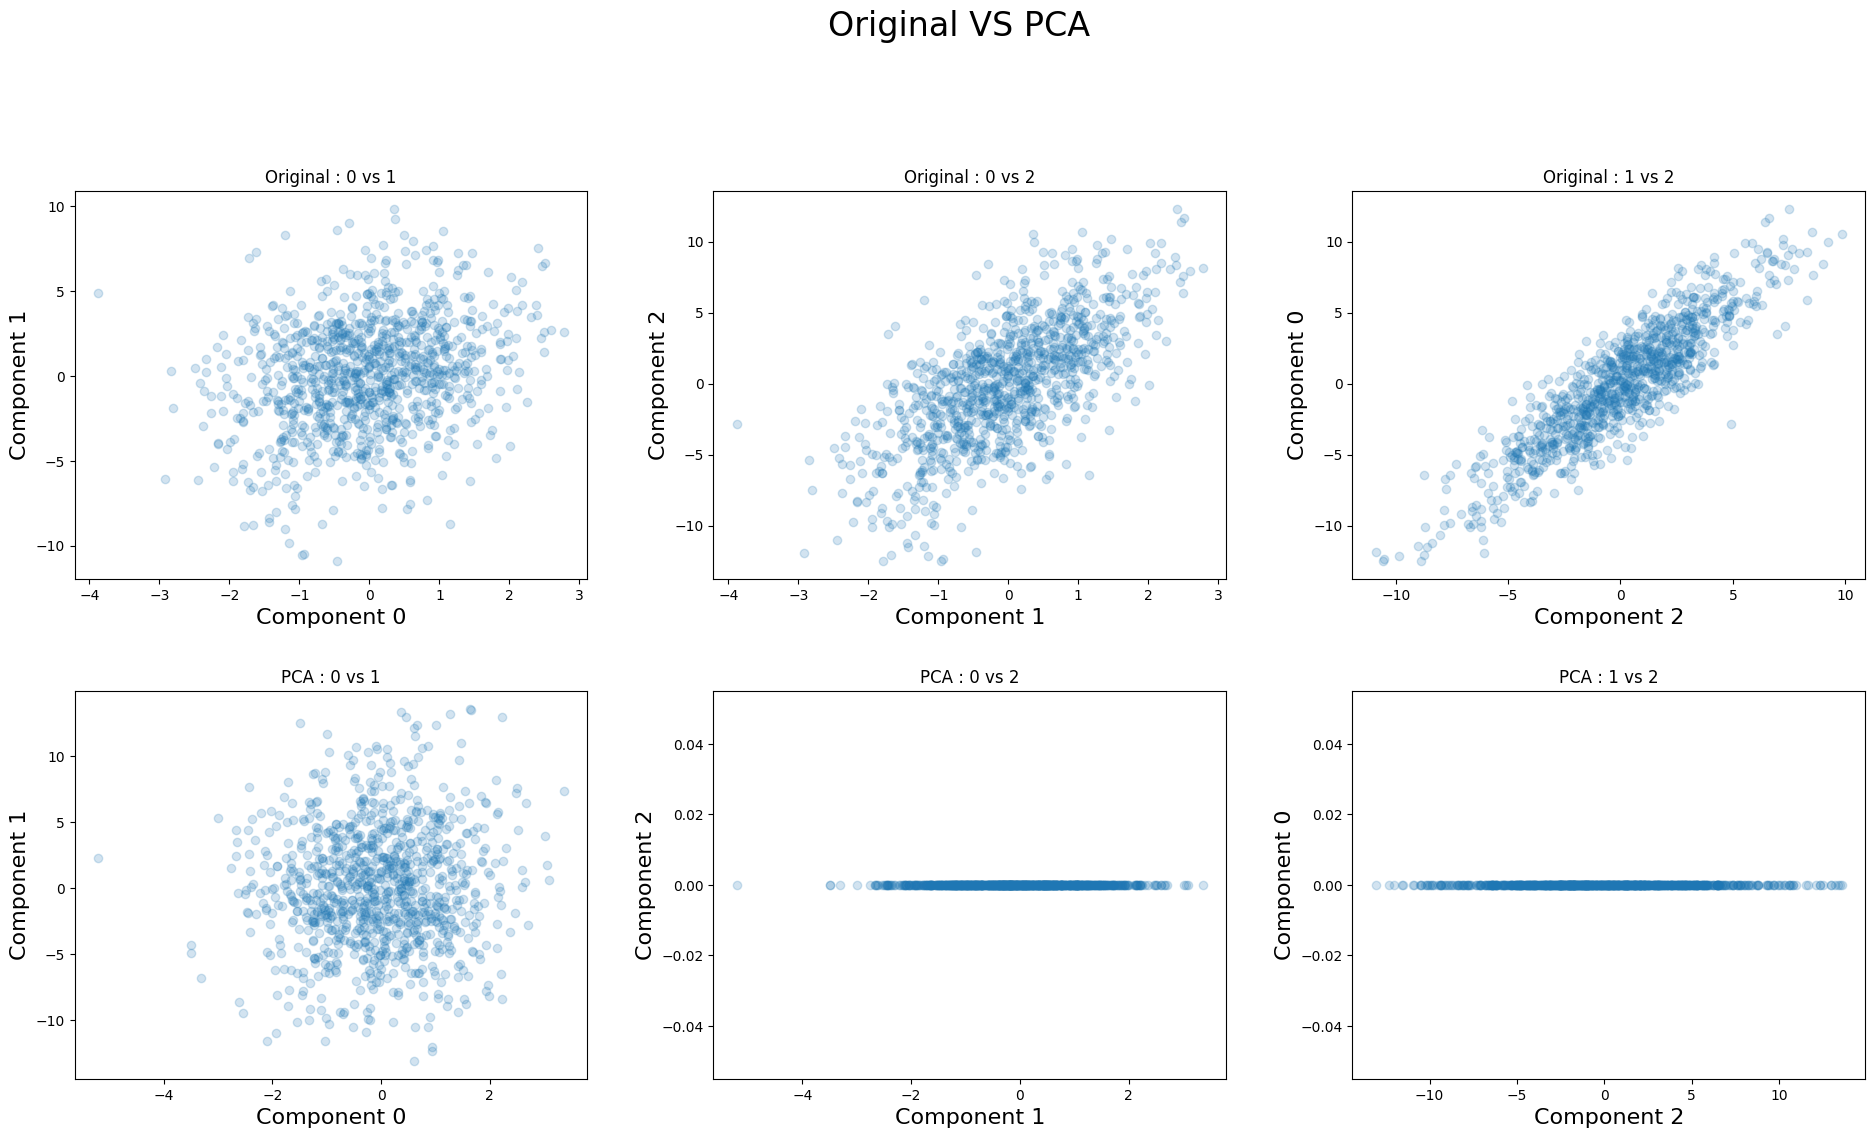

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

fig.suptitle('Original VS PCA', fontsize=24)

fig.tight_layout(pad=6.0)

# Original Data Scatter Plots
ax[0,0].scatter(X[:,0], X[:,1], alpha=0.2)
ax[0,0].set_title("Original : 0 vs 1")
ax[0,1].scatter(X[:,0], X[:,2], alpha=0.2)
ax[0,1].set_title("Original : 0 vs 2")
ax[0,2].scatter(X[:,1], X[:,2], alpha=0.2)
ax[0,2].set_title("Original : 1 vs 2")

# PCA Scatter Plots
ax[1,0].scatter(Xp[:,0], Xp[:,1], alpha=0.2)
ax[1,0].set_title("PCA : 0 vs 1")
ax[1,1].scatter(Xp[:,0], Xp[:,2], alpha=0.2)
ax[1,1].set_title("PCA : 0 vs 2")
ax[1,2].scatter(Xp[:,1], Xp[:,2], alpha=0.2)
ax[1,2].set_title("PCA : 1 vs 2")


for i in range(2):
    for j in range(3):
        ax[i,j].set_xlabel('Component '+str(j), fontsize=16)
        ax[i,j].set_ylabel('Component '+str((j+1)%3), fontsize=16)

plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

##### Generate Data with noise

In [10]:
# Generate noise
sigma1 = 1
sigma2 = 3
noise_std = min(sigma1, sigma2) / 20

# Append noise to the original matrix
for i in range(10):
    noise = np.random.normal(0, noise_std, N)
    X = np.concatenate((X, noise.reshape(-1, 1)), axis=1)

print(f"- Shape : {X.shape} [not a square matrix]\n\n- Here, the final matrix used :\n\n{X}")

- Shape : (1000, 13) [not a square matrix]

- Here, the final matrix used :

[[-1.23627059e+00 -2.88077869e+00 -5.35331987e+00 ... -8.19341539e-04
  -2.15258450e-02 -9.67135965e-02]
 [-6.12387962e-01 -3.57987956e+00 -4.80465549e+00 ... -5.62077796e-02
   1.57772684e-02  3.59901487e-03]
 [-9.27582184e-01 -2.03057819e+00 -3.88574256e+00 ... -1.55338884e-02
   4.95717925e-02 -7.50555101e-02]
 ...
 [ 3.22052208e-01 -2.54530414e+00 -1.90119972e+00 ... -4.44449469e-02
   1.32911940e-02  1.66954132e-02]
 [ 2.60108697e-01  7.33904450e-01  1.25412184e+00 ...  2.01843991e-03
  -3.45324825e-02  1.06951937e-01]
 [ 8.95907466e-02  1.46336819e+00  1.64254968e+00 ... -1.71320640e-02
  -2.37214749e-02 -4.49571185e-02]]


##### Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix

In [11]:
# Calculate the covariance matrix of the dataset.
cov = np.cov(X, rowvar=False)
print(f"Covariance matrix:\n{cov}\n")

# Perform eigendecomposition on the covariance matrix
l, V = la.eig(cov)
l = np.real_if_close(l)

print(f"Eigendecomposition => Eigenvalues:\n\n{l}\n")
print(f"Eigendecomposition => Eigenvectors:\n\n{V}\n")

Covariance matrix:
[[ 1.00175476e+00  8.95639405e-01  2.89914892e+00  6.98568584e-04
  -1.83903932e-03  2.23524975e-03  1.28232399e-03  4.74836111e-04
  -1.00123693e-03  7.82029543e-05 -7.94366835e-05 -3.72509051e-04
  -2.69734858e-03]
 [ 8.95639405e-01  1.06152923e+01  1.24065711e+01 -3.50269337e-04
   3.95405329e-03 -6.00019661e-04  4.10595083e-04  9.42256670e-03
  -5.78538358e-03  1.16885308e-04 -1.08034020e-03  9.13043286e-03
   1.19309184e-03]
 [ 2.89914892e+00  1.24065711e+01  1.82048689e+01  1.04686783e-03
   2.75974649e-04  3.87047984e-03  2.97524307e-03  1.03722389e-02
  -7.78785745e-03  2.73291217e-04 -1.23921357e-03  8.38541476e-03
  -4.20160531e-03]
 [ 6.98568584e-04 -3.50269337e-04  1.04686783e-03  2.40159589e-03
  -8.21455222e-06  6.37955731e-05 -1.10040783e-04 -2.51771702e-05
  -5.82860552e-05  6.13203912e-05  6.79864608e-05 -6.70136138e-06
  -2.65480967e-05]
 [-1.83903932e-03  3.95405329e-03  2.75974649e-04 -8.21455222e-06
   2.60578961e-03 -4.45110874e-05  9.14238487e-

##### Find the eigenvectors and eigenvalues using the SVD

In [12]:
# Perform Singular Value Decomposition (SVD) on the matix
U, S, Vt = la.svd(X)

# Normalizing the singular values to get the eigenvalues for SVD
# Rescale the SVD spectrum to get the eigenvalues
l_svd = S**2 / (N-1)

# The matrix Vt contains the eigenvectors

print(f"SVD => Eigenvalues:\n\n{l_svd}\n")
print(f"SVD => Eigenvectors:\n\n{Vt}\n")

SVD => Eigenvalues:

[2.76921779e+01 2.13557661e+00 2.78460901e-03 2.72830390e-03
 2.65045813e-03 2.57390416e-03 2.53846958e-03 2.45427875e-03
 2.34993496e-03 2.28915003e-03 2.24630354e-03 2.11722555e-03
 9.71271622e-32]

SVD => Eigenvectors:

[[ 1.06856048e-01  5.88034139e-01  8.01746236e-01  2.46016928e-05
   8.57258742e-05  1.09531625e-04  9.83667455e-05  5.02171342e-04
  -3.52114996e-04  1.15809105e-05 -6.18369489e-05  4.34335985e-04
  -1.07047744e-04]
 [ 5.67372023e-01 -6.98242115e-01  4.36501931e-01  4.74219409e-04
  -1.69095474e-03  1.64925653e-03  7.54702963e-04 -8.39413175e-04
   3.83579163e-05  7.56353243e-05 -3.44734661e-05 -1.41054750e-03
  -1.98111042e-03]
 [-1.68286410e-04  1.52143985e-04 -1.84428835e-04 -2.19162000e-02
  -5.22491833e-01  3.23172390e-01 -1.46710676e-01  2.23646270e-01
  -2.33662318e-01 -3.83855878e-01 -2.99048412e-01 -1.26881640e-01
   4.93018754e-01]
 [-4.38789270e-04  7.15542397e-04 -1.62036143e-04  3.86321607e-01
  -2.23728437e-01  4.50420593e-02 -6.37

##### Check that the two procedures yield to same result

In [13]:
# Verify the definition of SVD by hand

m, n = X.shape[0], X.shape[1]

s = np.zeros((m, n))
for i in range(min(m, n)):
    s[i, i] = S[i]
print(f"S = \n{s}\n")

SVD = np.dot(U, np.dot(s, Vt))
print(f"SVD = \n{SVD}\n")
print(f"=> Are the SVD and X matrices equal ? {np.allclose(SVD, X)}")

l_SVD, V_SVD = la.eig(np.cov(SVD, rowvar = False))

print(f"""\nSo, we have :  
l == l_SVD ? {np.allclose(l, l_SVD) } 
V == V_SVD ? {np.allclose(V, V_SVD) }
""")

S = 
[[166.32644313   0.           0.         ...   0.           0.
    0.        ]
 [  0.          46.18918737   0.         ...   0.           0.
    0.        ]
 [  0.           0.           1.66788021 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]

SVD = 
[[-1.23627059e+00 -2.88077869e+00 -5.35331987e+00 ... -8.19341539e-04
  -2.15258450e-02 -9.67135965e-02]
 [-6.12387962e-01 -3.57987956e+00 -4.80465549e+00 ... -5.62077796e-02
   1.57772684e-02  3.59901487e-03]
 [-9.27582184e-01 -2.03057819e+00 -3.88574256e+00 ... -1.55338884e-02
   4.95717925e-02 -7.50555101e-02]
 ...
 [ 3.22052208e-01 -2.54530414e+00 -1.90119972e+00 ... -4.44449469e-02
   1.32911940e-02  1.66954132e-02]
 [ 2.60108697e-01  7.33904450e-01  1.25412184e+00 ...  2.01843991e-03
  -3.4532482

##### What percent of the total dataset's variability is explained by the principal components? 
##### Given how the dataset was constructed, do these make sense? 

In [14]:
Lambda = np.diag(l_svd)
print(f"Lambda = \n{Lambda}\n")
print(f"Trace(X) = {cov.trace()}\n")
print(f"Trace(Lambda) = {Lambda.trace()}\n")

for i in range(Lambda.shape[0]):
    variability = (Lambda[i, i] / Lambda.trace()) * 100
    print(f"\t- By selecting component {i}, we retain {variability:.2f}% of the total variability.")

Lambda = 
[[2.76921779e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 2.13557661e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.78460901e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.72830390e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.65045813e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.0

##### Reduce the dimensionality of the system so that at least 99% of the total variability is retained

In [15]:
# Calculate the percentage of variance explained by each component
variance = l_svd / l_svd.sum()

# Calculate the cumulative variance
cum_variance = variance.cumsum()
print(f"Cumulative variance explained => {cum_variance}")

n_99 = np.where(cum_variance >= 0.99)[0][0] + 1

print(f"Number of components needed to obtain 99% of total variability: {n_99}")

Lambda[n_99:, n_99:] = 0
V[n_99:, :] = 0

Cumulative variance explained => [0.92763386 0.9991715  0.99926478 0.99935618 0.99944496 0.99953118
 0.99961622 0.99969843 0.99977715 0.99985383 0.99992908 1.
 1.        ]
Number of components needed to obtain 99% of total variability: 2


##### Redefine the data according to the new basis from the PCA

In [16]:
Xp = np.dot(X, V.T)
print(f"Data according to the new basis = \n{Xp}\n")

Data according to the new basis = 
[[ 6.13756785  0.90107871  0.         ...  0.          0.
   0.        ]
 [ 6.01938346 -0.17766091  0.         ...  0.          0.
   0.        ]
 [ 4.42386495  0.71412032  0.         ...  0.          0.
   0.        ]
 ...
 [ 2.96217891 -1.19056399  0.         ...  0.          0.
   0.        ]
 [-1.46807441 -0.15264478  0.         ...  0.          0.
   0.        ]
 [-2.18084176  0.29830823  0.         ...  0.          0.
   0.        ]]



##### Plot the data, in both the original and the new basis. 

In [17]:
num_features = 13

total_plots = num_features * (num_features - 2)

num_cols = 12
num_rows = (total_plots + num_cols - 1) // num_cols

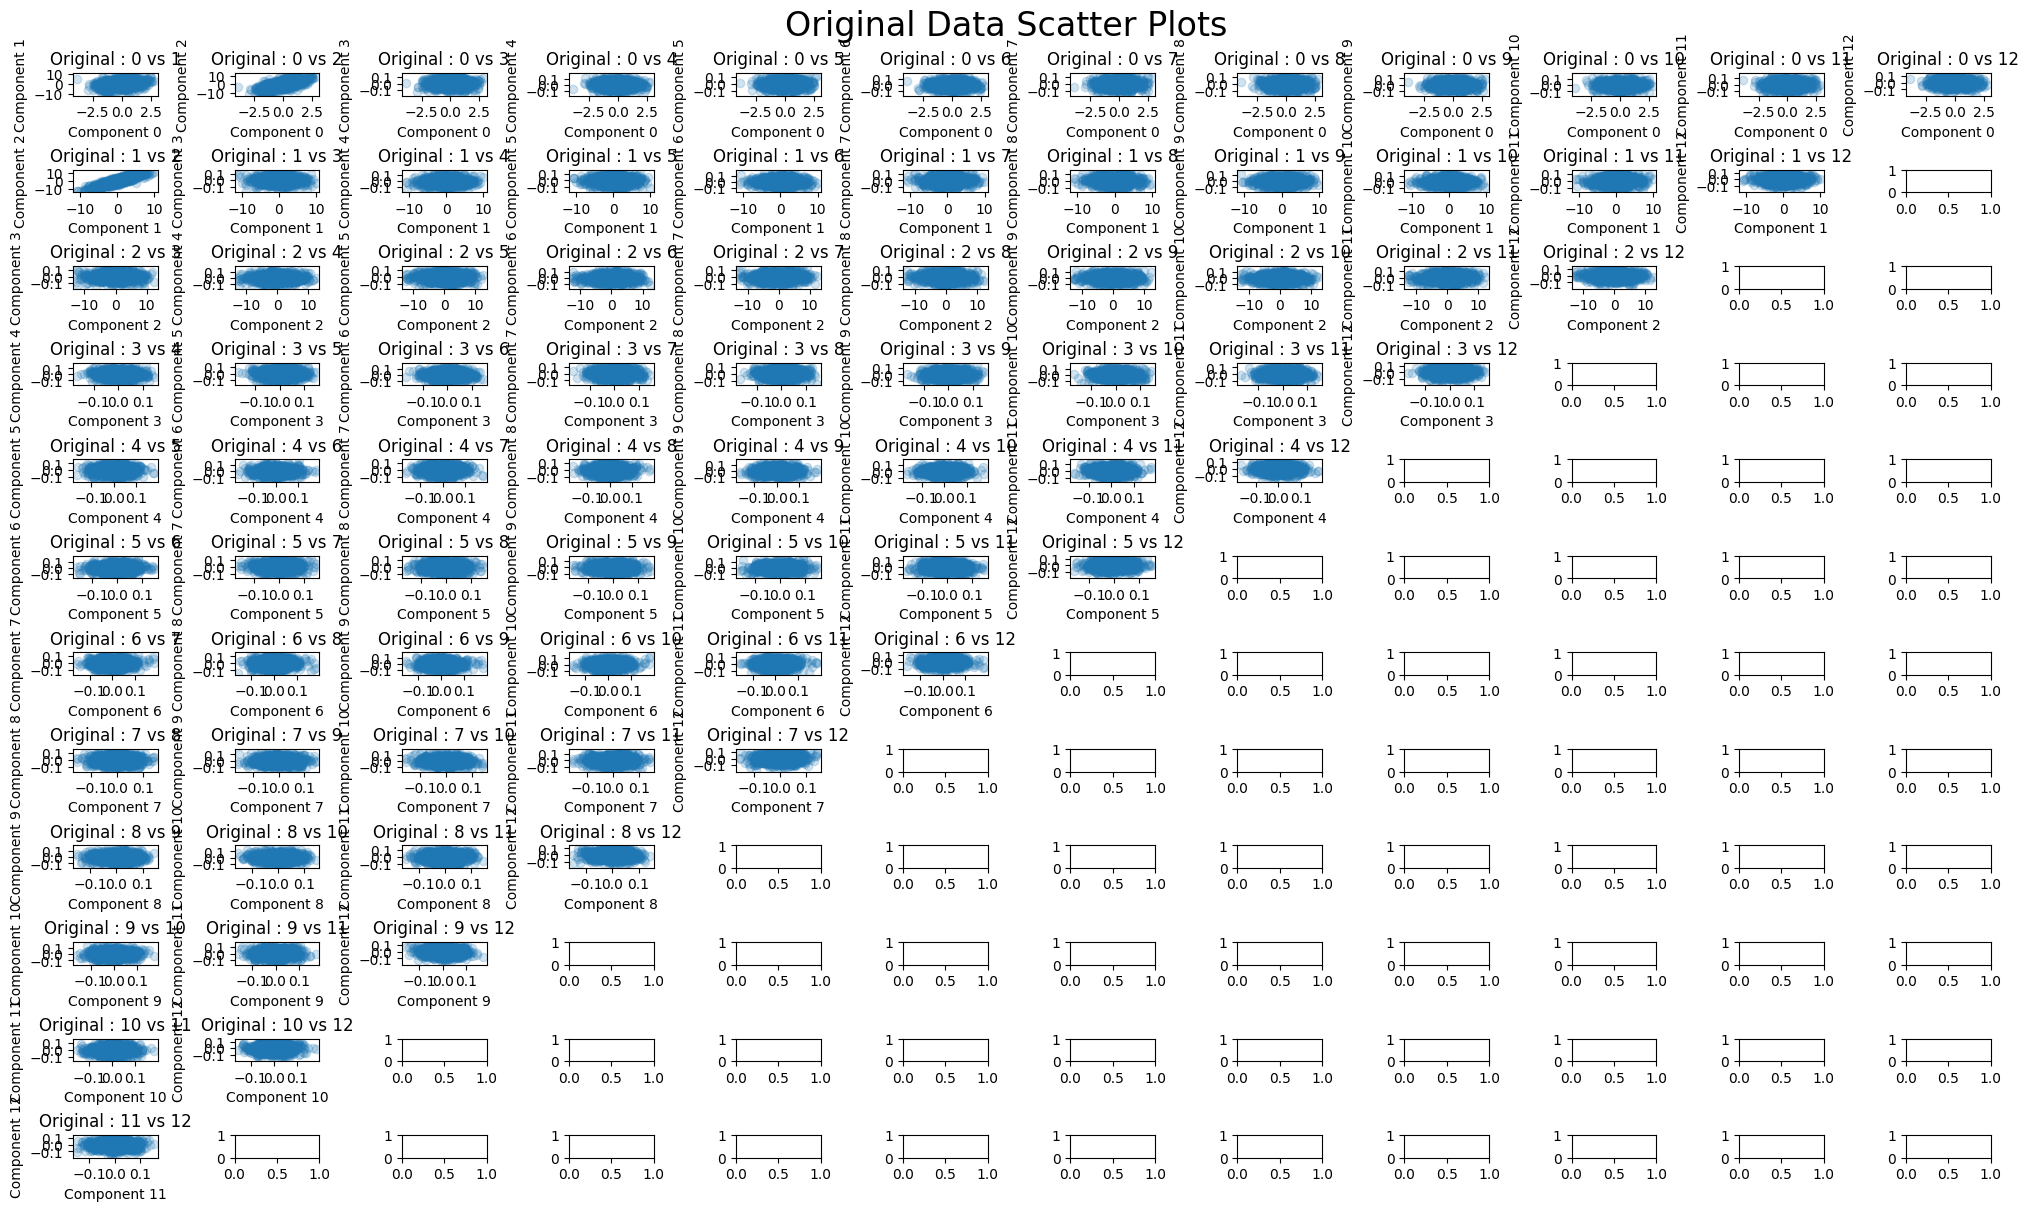

In [18]:
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12), constrained_layout=True)
fig.suptitle('Original Data Scatter Plots', fontsize=24)

plot_count = 0
for i in range(num_features):
    for j in range(i + 1, num_features):
        row = plot_count // num_cols
        col = plot_count % num_cols

        # Scatter plot for each unique pair of features
        ax[row, col].scatter(X[:, i], X[:, j], alpha=0.2)
        ax[row, col].set_title(f"Original : {i} vs {j}")
        ax[row, col].set_xlabel(f'Component {i}')
        ax[row, col].set_ylabel(f'Component {j}')
                    
        plot_count += 1

        if j == num_cols :
            plot_count += i
            break

plt.show()

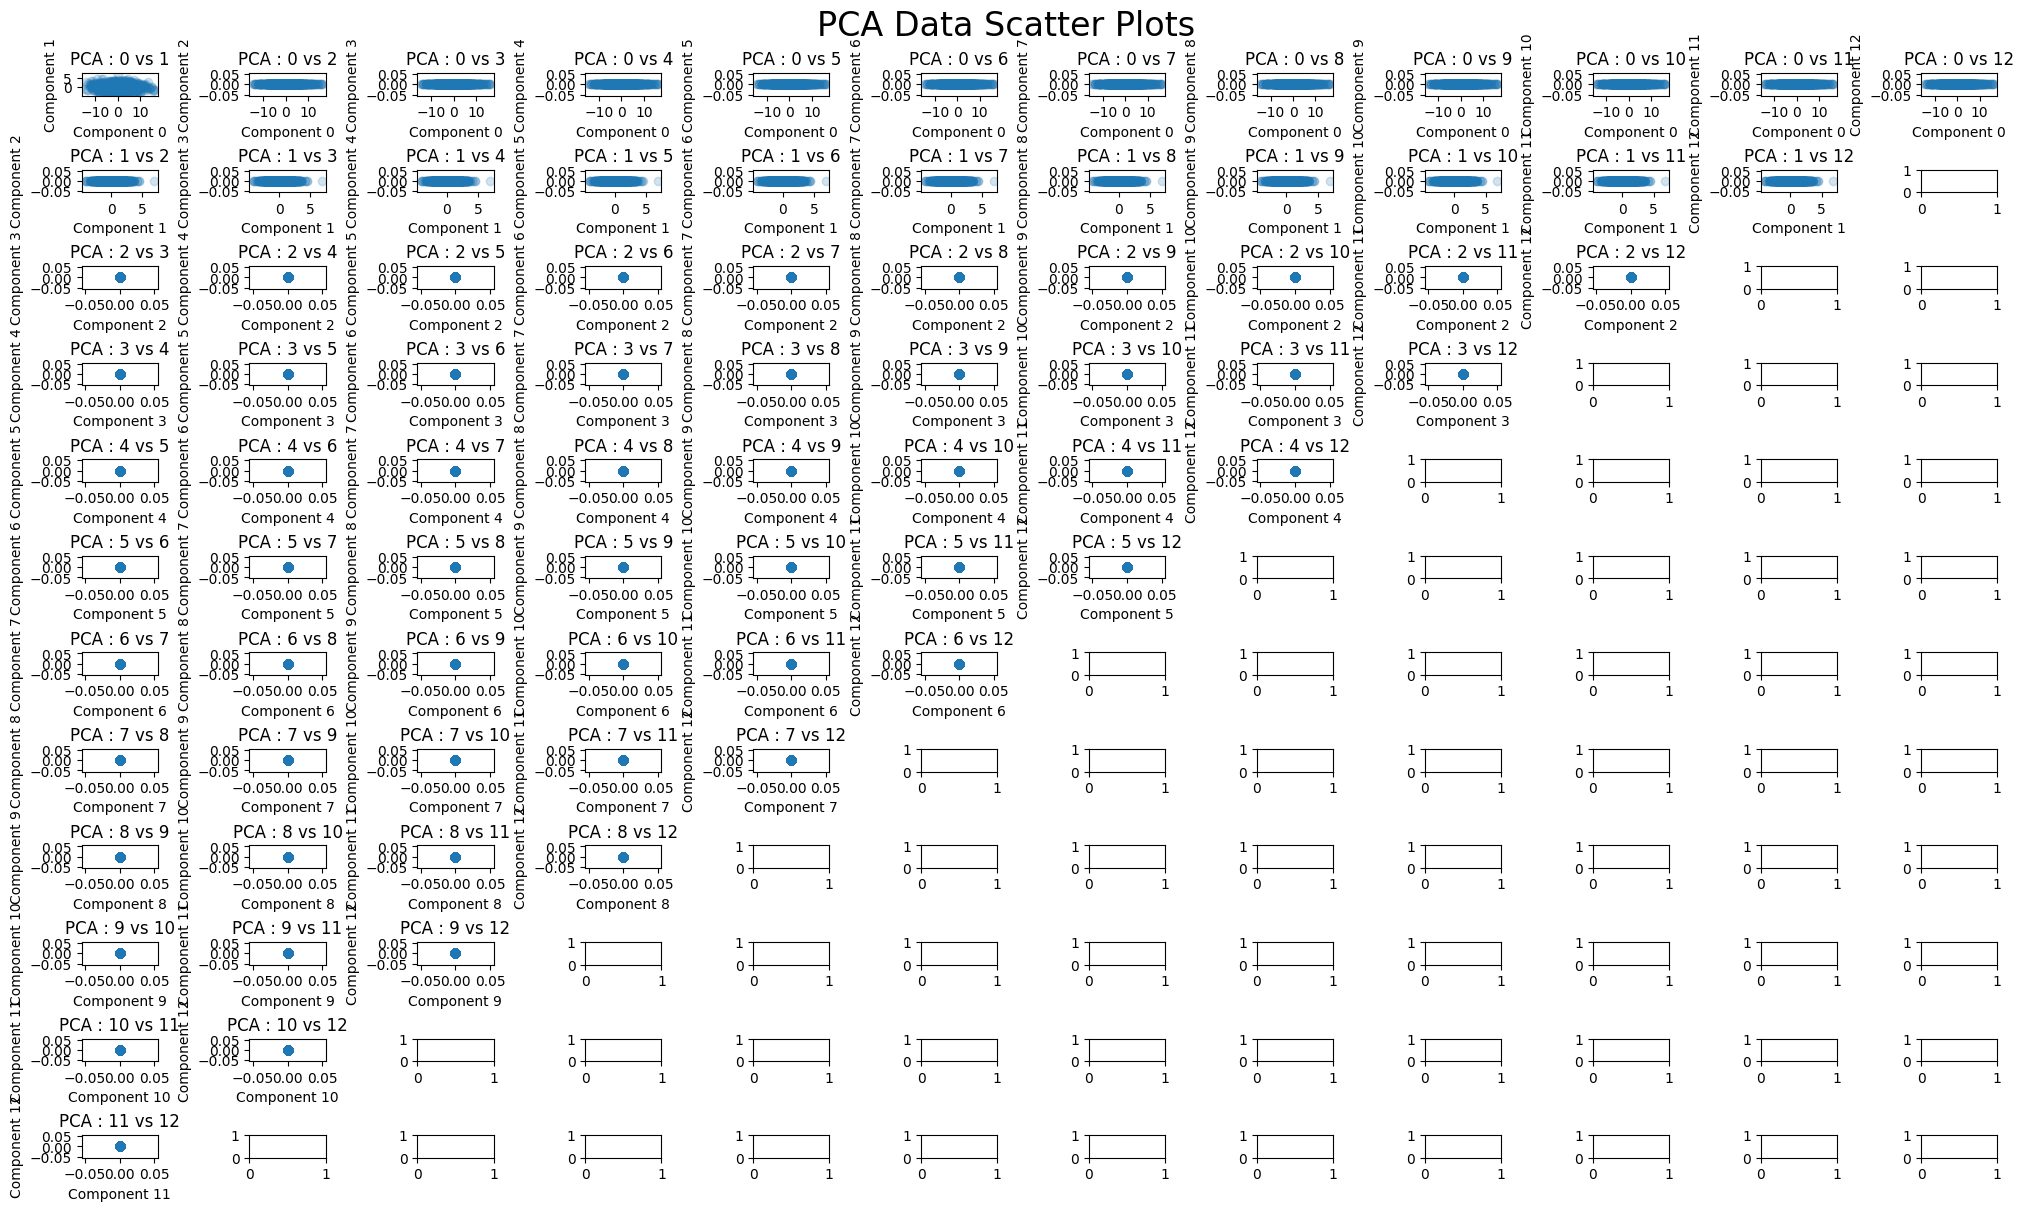

In [19]:
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12), constrained_layout=True)
fig.suptitle('PCA Data Scatter Plots', fontsize=24)

plot_count = 0
for i in range(num_features):
    for j in range(i + 1, num_features):
        row = plot_count // num_cols
        col = plot_count % num_cols

        # Scatter plot for each unique pair of features
        ax[row, col].scatter(Xp[:, i], Xp[:, j], alpha=0.2)
        ax[row, col].set_title(f"PCA : {i} vs {j}")
        ax[row, col].set_xlabel(f'Component {i}')
        ax[row, col].set_ylabel(f'Component {j}')

        plot_count += 1
    
        if j == num_cols :
            plot_count += i
            break

plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [20]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

##### Generate the dataset

In [21]:
df = pd.read_csv('./data/magic04.data', sep=",", header=None)
df = df.iloc[:, :-1]
X = df.to_numpy()

print(f"- Shape : {X.shape} [not a square matrix]\n\n- Here, the final matrix used :\n\n{X}")

- Shape : (19020, 10) [not a square matrix]

- Here, the final matrix used :

[[ 28.7967  16.0021   2.6449 ...  -8.2027  40.092   81.8828]
 [ 31.6036  11.7235   2.5185 ...  -9.9574   6.3609 205.261 ]
 [162.052  136.031    4.0612 ... -45.216   76.96   256.788 ]
 ...
 [ 75.4455  47.5305   3.4483 ...  -9.4662  30.2987 256.5166]
 [120.5135  76.9018   3.9939 ... -63.8389  84.6874 408.3166]
 [187.1814  53.0014   3.2093 ...  31.4755  52.731  272.3174]]


##### Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix

In [22]:
# Calculate the covariance matrix of the dataset.
cov = np.cov(X, rowvar=False)
print(f"Covariance matrix:\n{cov}\n")

# Perform eigendecomposition on the covariance matrix
l, V = la.eig(cov)
l = np.real_if_close(l)

print(f"Eigendecomposition => Eigenvalues:\n\n{l}\n")
print(f"Eigendecomposition => Eigenvectors:\n\n{V}\n")

Covariance matrix:
[[ 1.79478093e+03  5.98863542e+02  1.40642293e+01 -4.88699477e+00
  -2.80038030e+00 -9.24434103e+02 -2.58727155e+02  1.18140078e+01
  -9.70681761e+00  1.32486413e+03]
 [ 5.98863542e+02  3.36577782e+02  6.22110176e+00 -2.04513685e+00
  -1.17822641e+00 -2.89972346e+02 -1.64893734e+02  1.51860869e+01
   3.16366938e+01  4.61786200e+02]
 [ 1.40642293e+01  6.22110176e+00  2.23349483e-01 -7.35110795e-02
  -4.22432318e-02 -4.47307815e+00  2.29353454e+00  1.52121337e-01
  -2.30292484e+00  1.54354673e+01]
 [-4.88699477e+00 -2.04513685e+00 -7.35110795e-02  3.34206468e-02
   1.97262797e-02  1.21519489e+00 -1.13652751e+00 -4.30025009e-02
   1.12273751e+00 -4.48566053e+00]
 [-2.80038030e+00 -1.17822641e+00 -4.22432318e-02  1.97262797e-02
   1.22126367e-02  6.55332684e-01 -6.69389146e-01 -2.52390547e-02
   6.62907179e-01 -2.51579453e+00]
 [-9.24434103e+02 -2.89972346e+02 -4.47307815e+00  1.21519489e+00
   6.55332684e-01  3.50535778e+03  8.27482747e+02  3.14793086e+00
  -8.60663498e

##### Find the eigenvectors and eigenvalues using the SVD

In [23]:
# Perform Singular Value Decomposition (SVD) on the matix
U, S, Vt = la.svd(X)

# Normalizing the singular values to get the eigenvalues for SVD
# Rescale the SVD spectrum to get the eigenvalues
l_svd = S**2 / (N-1)

# The matrix Vt contains the eigenvectors

print(f"SVD => Eigenvalues:\n\n{l_svd}\n")
print(f"SVD => Eigenvectors:\n\n{Vt}\n")

SVD => Eigenvalues:

[9.08893837e+05 7.99323694e+04 3.96852872e+04 2.54845661e+04
 1.56386050e+04 8.25616830e+03 2.23434645e+03 1.07395581e+01
 6.63578096e-01 8.04616735e-03]

SVD => Eigenvectors:

[[-2.66209154e-01 -1.08402211e-01 -1.24913798e-02 -1.50702188e-03
  -8.50661403e-04  4.52370968e-02 -4.73392043e-02 -1.52135693e-03
  -1.11208650e-01 -9.48981319e-01]
 [ 2.37028048e-01  8.28299067e-02 -1.91985452e-03 -7.18476006e-04
  -3.99156371e-04 -8.15277791e-01 -5.12468617e-01  2.16259131e-03
   3.17285661e-02 -9.29473536e-02]
 [-6.48087984e-02  2.48735300e-02  1.42306518e-03  1.29726671e-03
   7.39574325e-04  5.10946282e-01 -8.41136165e-01  1.13574967e-02
   1.49546620e-01  6.40900669e-02]
 [ 8.45567461e-01  3.16061902e-01  8.69235776e-03 -1.98085809e-03
  -1.15792412e-03  2.51110496e-01  1.05168145e-01  1.02775242e-02
   1.69414148e-01 -2.86559105e-01]
 [ 1.97037250e-01  1.86343754e-02 -9.34344872e-03 -4.74012296e-03
  -2.71825660e-03  9.25811976e-02 -1.24900718e-01  7.12181062e-03
  

##### Check that the two procedures yield to same result

In [24]:
# Verify the definition of SVD by hand

m, n = X.shape[0], X.shape[1]

s = np.zeros((m, n))
for i in range(min(m, n)):
    s[i, i] = S[i]
print(f"S = \n{s}\n")

SVD = np.dot(U, np.dot(s, Vt))
print(f"SVD = \n{SVD}\n")
print(f"=> Are the SVD and X matrices equal ? {np.allclose(SVD, X)}")

l_SVD, V_SVD = la.eig(np.cov(SVD, rowvar = False))

print(f"""\nSo, we have :  
l == l_SVD ? {np.allclose(l, l_SVD) } 
V == V_SVD ? {np.allclose(V, V_SVD) }
""")

S = 
[[30132.78851279     0.             0.         ...     0.
      0.             0.        ]
 [    0.          8936.01907968     0.         ...     0.
      0.             0.        ]
 [    0.             0.          6296.47535384 ...     0.
      0.             0.        ]
 ...
 [    0.             0.             0.         ...     0.
      0.             0.        ]
 [    0.             0.             0.         ...     0.
      0.             0.        ]
 [    0.             0.             0.         ...     0.
      0.             0.        ]]

SVD = 
[[ 28.7967  16.0021   2.6449 ...  -8.2027  40.092   81.8828]
 [ 31.6036  11.7235   2.5185 ...  -9.9574   6.3609 205.261 ]
 [162.052  136.031    4.0612 ... -45.216   76.96   256.788 ]
 ...
 [ 75.4455  47.5305   3.4483 ...  -9.4662  30.2987 256.5166]
 [120.5135  76.9018   3.9939 ... -63.8389  84.6874 408.3166]
 [187.1814  53.0014   3.2093 ...  31.4755  52.731  272.3174]]

=> Are the SVD and X matrices equal ? True

So, we have :  
l 

##### What percent of the total dataset's variability is explained by the principal components? 
##### Given how the dataset was constructed, do these make sense? 

In [25]:
Lambda = np.diag(l_svd)
print(f"Lambda = \n{Lambda}\n")
print(f"Trace(X) = {cov.trace()}\n")
print(f"Trace(Lambda) = {Lambda.trace()}\n")

for i in range(Lambda.shape[0]):
    variability = (Lambda[i, i] / Lambda.trace()) * 100
    print(f"\t- By selecting component {i}, we retain {variability:.2f}% of the total variability.")

Lambda = 
[[9.08893837e+05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.99323694e+04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.96852872e+04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.54845661e+04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.56386050e+04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 8.25616830e+03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0

##### Reduce the dimensionality of the system so that at least 99% of the total variability is retained

In [26]:
# Calculate the percentage of variance explained by each component
variance = l_svd / l_svd.sum()

# Calculate the cumulative variance
cum_variance = variance.cumsum()
print(f"Cumulative variance explained => {cum_variance}")

n_99 = np.where(cum_variance >= 0.99)[0][0] + 1

print(f"Number of components needed to obtain 99% of total variability: {n_99}")

Lambda[n_99:, n_99:] = 0
V[n_99:, :] = 0

Cumulative variance explained => [0.84146195 0.91546404 0.95220503 0.97579887 0.99027722 0.99792086
 0.99998944 0.99999938 0.99999999 1.        ]
Number of components needed to obtain 99% of total variability: 5


##### Redefine the data according to the new basis from the PCA

In [27]:
Xp = np.dot(X, V.T)
print(f"Data according to the new basis = \n{Xp}\n")

Data according to the new basis = 
[[ 17.90627737 -16.02775737  -5.62428371 ...   0.           0.
    0.        ]
 [ 18.77837657 -17.76950767  11.34201813 ...   0.           0.
    0.        ]
 [ 46.65112706  88.84263455  20.23802049 ...   0.           0.
    0.        ]
 ...
 [ 44.79654799 -27.69308419   3.05687102 ...   0.           0.
    0.        ]
 [ 17.47569161 104.97350679  38.27742265 ...   0.           0.
    0.        ]
 [ 14.48104494 178.74417069 -40.32349417 ...   0.           0.
    0.        ]]



##### Plot the data, in both the original and the new basis. 

In [28]:
num_features = 10

total_plots = num_features * (num_features - 2)

num_cols = 9
num_rows = (total_plots + num_cols - 1) // num_cols

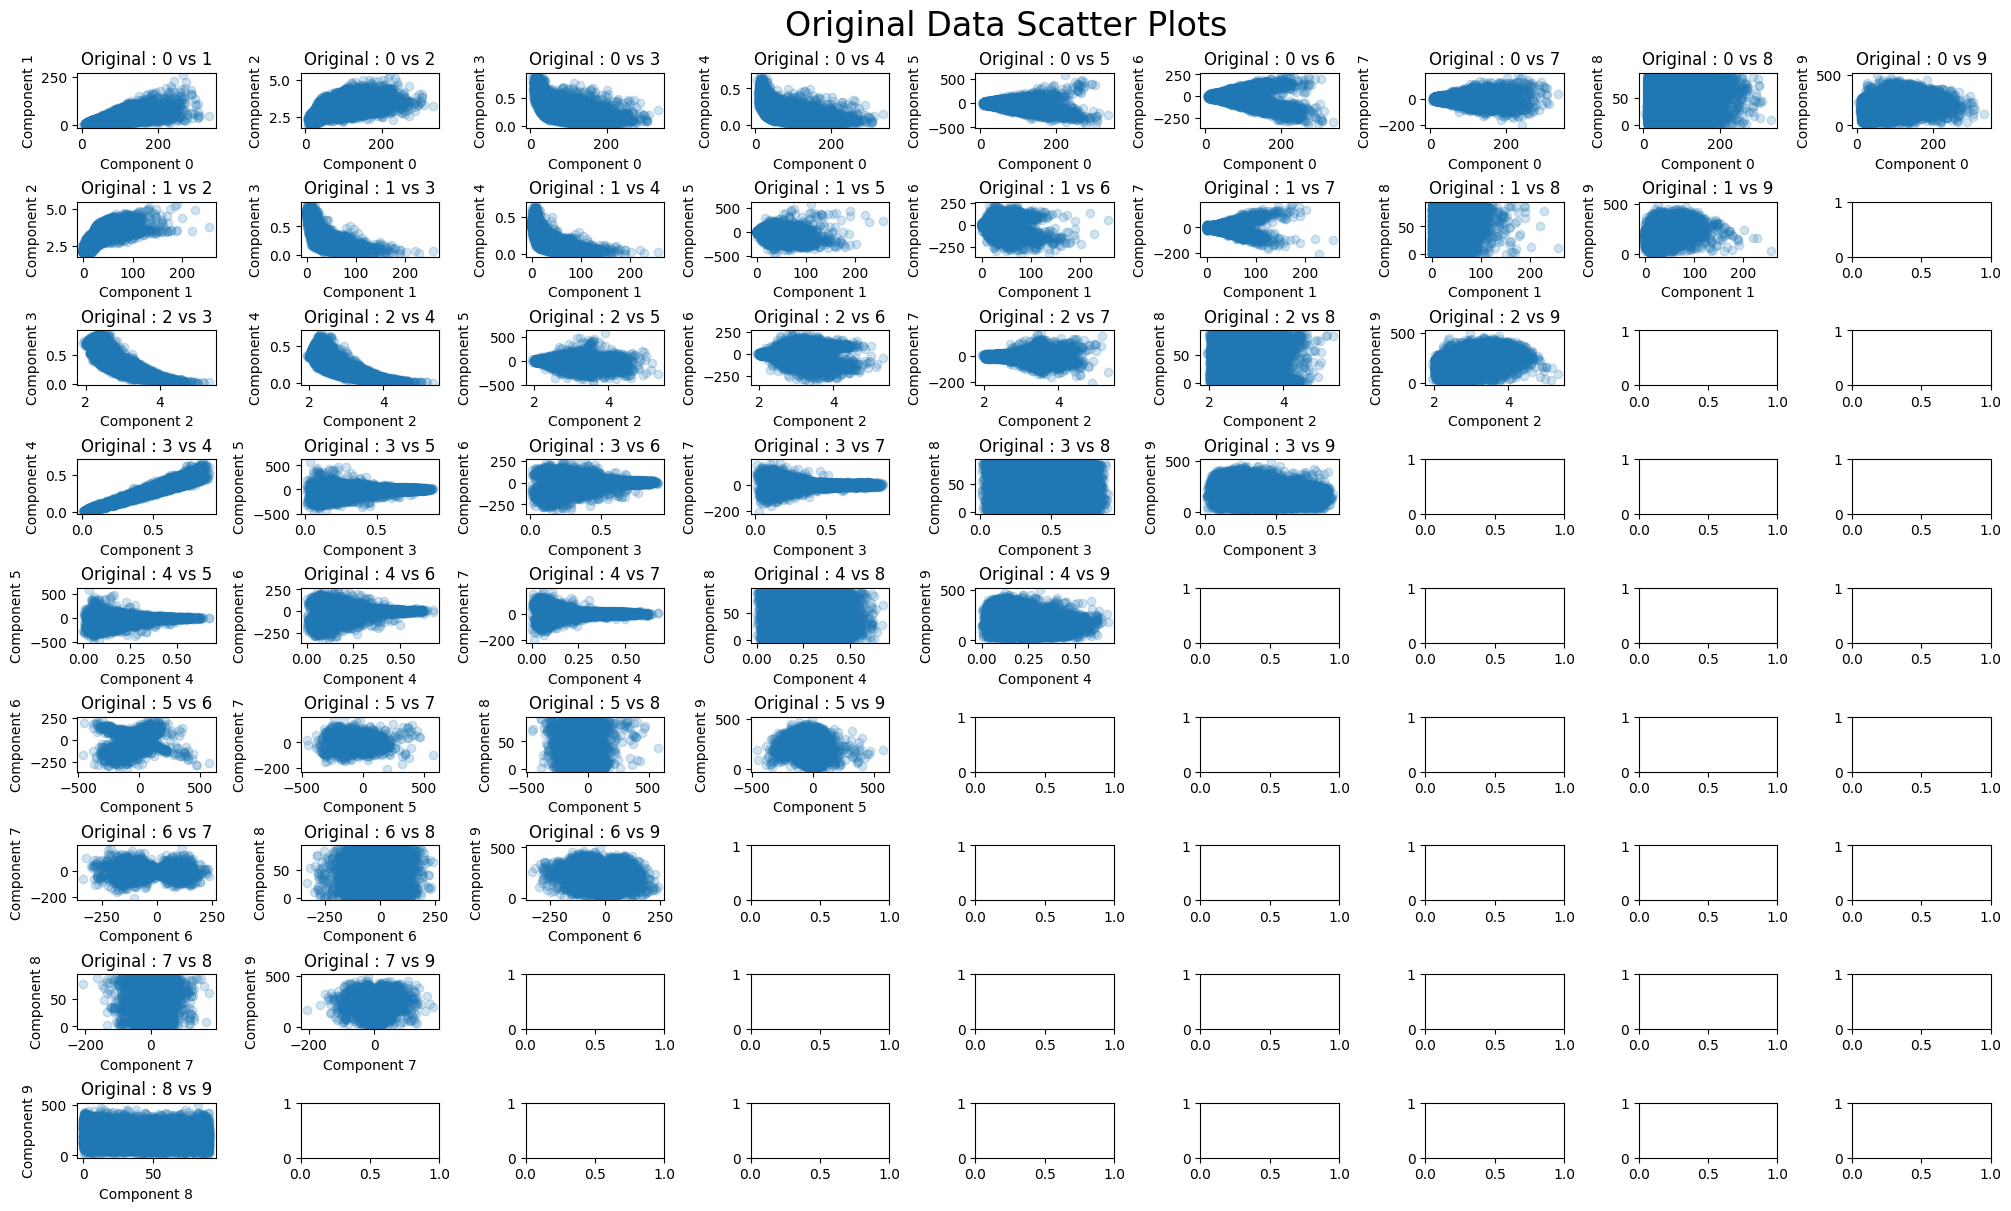

In [29]:
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12), constrained_layout=True)
fig.suptitle('Original Data Scatter Plots', fontsize=24)

plot_count = 0
for i in range(num_features):
    for j in range(i + 1, num_features):
        row = plot_count // num_cols
        col = plot_count % num_cols

        # Scatter plot for each unique pair of features
        ax[row, col].scatter(X[:, i], X[:, j], alpha=0.2)
        ax[row, col].set_title(f"Original : {i} vs {j}")
        ax[row, col].set_xlabel(f'Component {i}')
        ax[row, col].set_ylabel(f'Component {j}')
                    
        plot_count += 1

        if j == num_cols :
            plot_count += i
            break

plt.show()

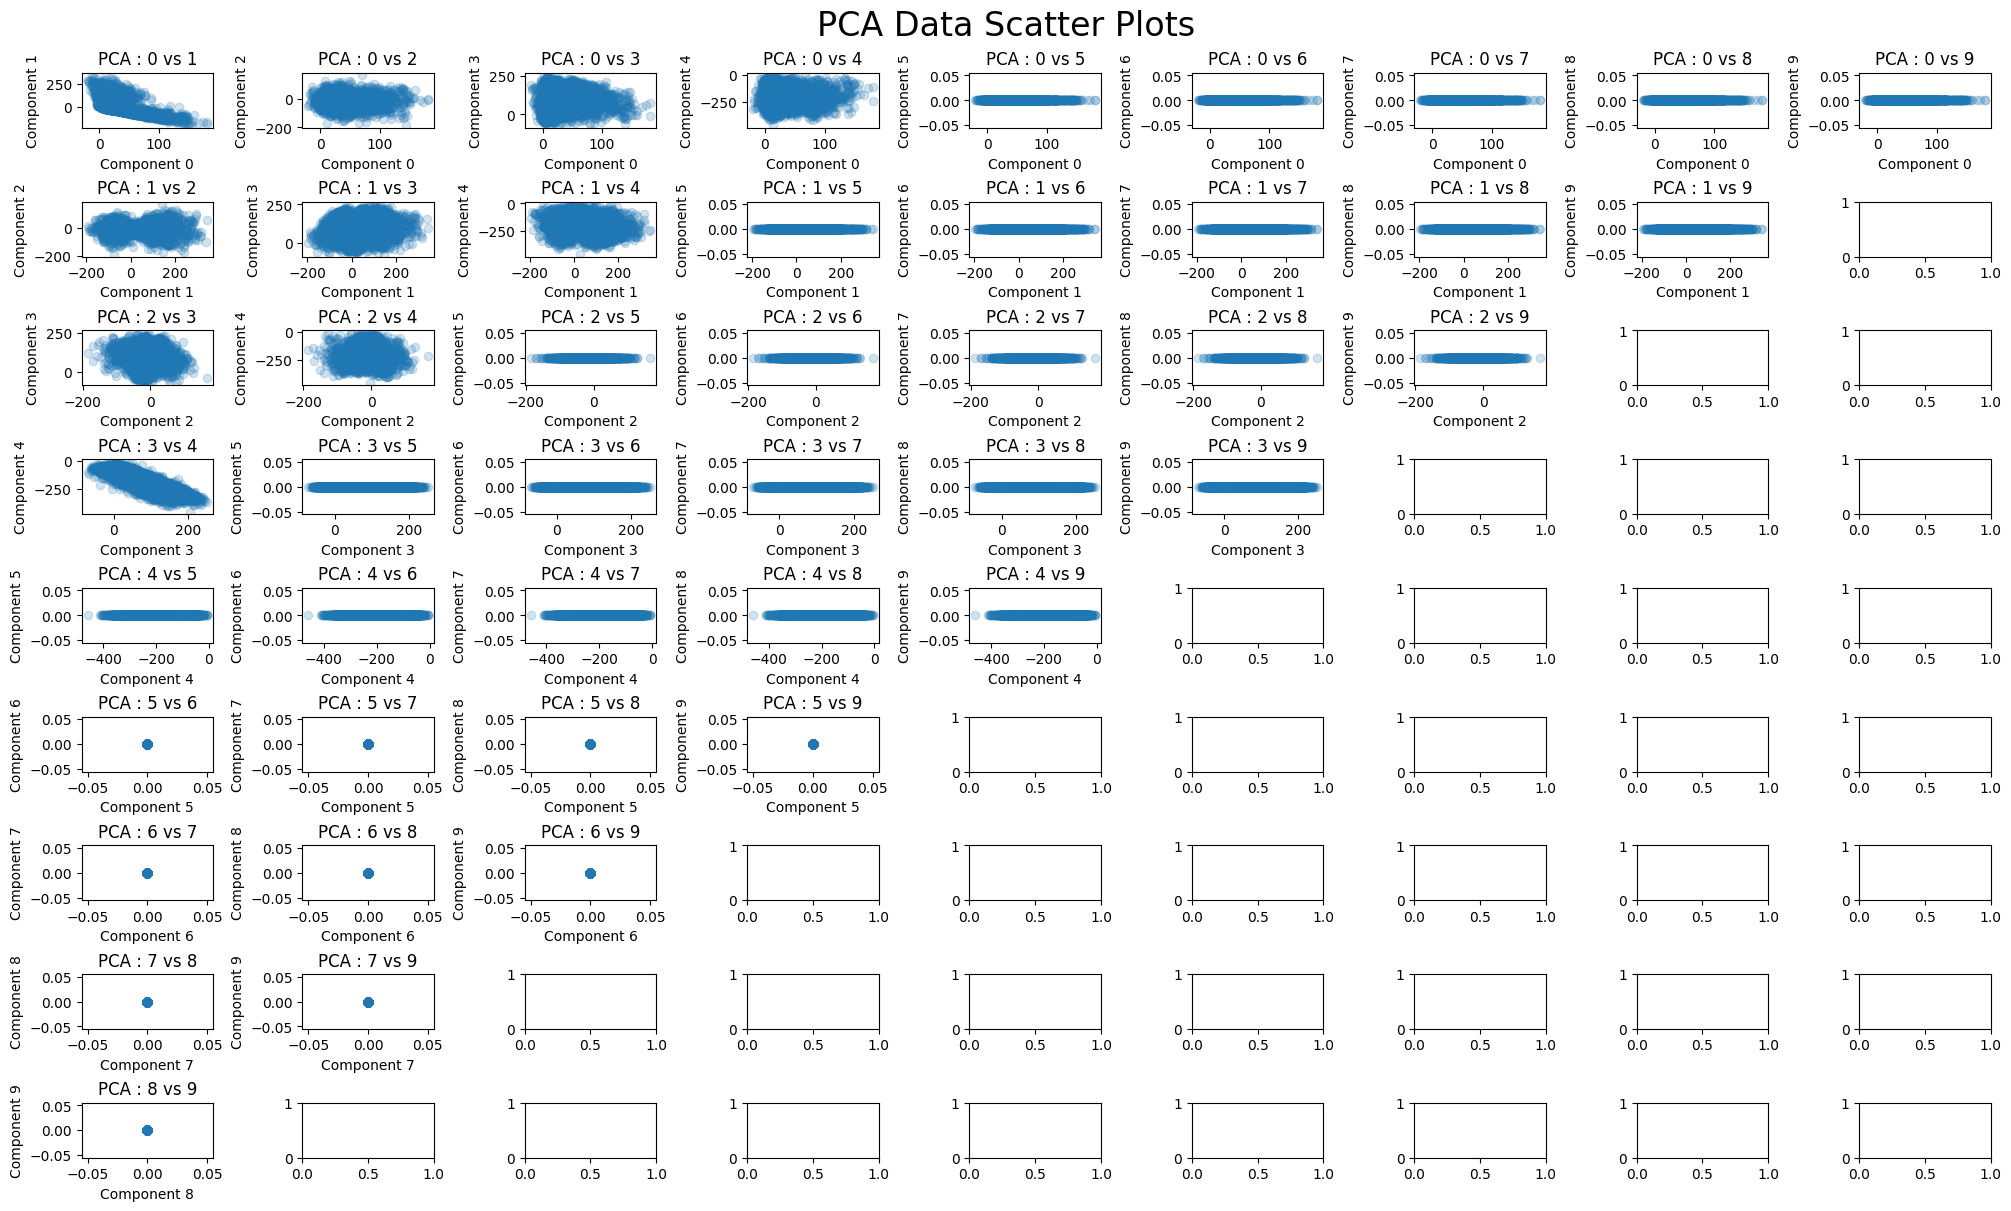

In [30]:
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12), constrained_layout=True)
fig.suptitle('PCA Data Scatter Plots', fontsize=24)

plot_count = 0
for i in range(num_features):
    for j in range(i + 1, num_features):
        row = plot_count // num_cols
        col = plot_count % num_cols

        # Scatter plot for each unique pair of features
        ax[row, col].scatter(Xp[:, i], Xp[:, j], alpha=0.2)
        ax[row, col].set_title(f"PCA : {i} vs {j}")
        ax[row, col].set_xlabel(f'Component {i}')
        ax[row, col].set_ylabel(f'Component {j}')

        plot_count += 1
    
        if j == num_cols :
            plot_count += i
            break

plt.show()